## Logistic Regression Assignment | Shivam Negi

### Problem Statement:

I decided to treat this as a classification problem by creating a new binary
variable affair (did the woman have at least one affair?) and trying to
predict the classification for each woman.

#### Dataset
The dataset I chose is the affairs dataset that comes with Statsmodels. It
was derived from a survey of women in 1974 by Redbook magazine, in
which married women were asked about their participation in extramarital
affairs. More information about the study is available in a 1978 paper from
the Journal of Political Economy.

#### Description of Variables
The dataset contains 6366 observations of 9 variables: 

* rate_marriage: woman's rating of her marriage (1 = very poor, 5 =very good)

* age: woman's age

* yrs_married: number of years married

* children: number of children

* religious: woman's rating of how religious she is (1 = not religious, 4 =strongly religious)

* educ: level of education (9 = grade school, 12 = high school, 14 = some college, 16 = college graduate, 17 = some graduate school, 20 = advanced degree)

* occupation: woman's occupation (1 = student, 2 = farming/semiskilled/unskilled, 3 = "white collar", 4 =
  teacher/nurse/writer/technician/skilled, 5 = managerial/business, 6 =
  professional with advanced degree)

* occupation_husb: husband's occupation (same coding as above)

* affairs: time spent in extra-marital affairs

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import confusion_matrix


dta = sm.datasets.fair.load_pandas().data
#add "affair" column: 1 represents having affairs, 0 represents not 

dta['affair'] = (dta.affairs >0).astype(int)
y, X = dmatrices('affair ~ rate_marriage + age + yrs_married + children +  religious + educ + C(occupation) + C(occupation_husb)', 
                 dta, return_type="dataframe")


X = X.rename(columns =
{'C(occupation)[T.2.0]':'occ_2',
'C(occupation)[T.3.0]':'occ_3',
'C(occupation)[T.4.0]':'occ_4',
'C(occupation)[T.5.0]':'occ_5',
'C(occupation)[T.6.0]':'occ_6',
'C(occupation_husb)[T.2.0]':'occ_husb_2',
'C(occupation_husb)[T.3.0]':'occ_husb_3',
'C(occupation_husb)[T.4.0]':'occ_husb_4',
'C(occupation_husb)[T.5.0]':'occ_husb_5',
'C(occupation_husb)[T.6.0]':'occ_husb_6'})
y = np.ravel(y)


## Data Preprocessing

In [3]:
X.head()

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0


In [4]:
X.describe()

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
count,6366.0,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,1.0,0.134936,0.437166,0.288093,0.116243,0.017122,0.205467,0.076971,0.318882,0.279453,0.083255,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865
std,0.0,0.341682,0.496075,0.452910,0.320541,0.129737,0.404074,0.266567,0.466080,0.448766,0.276289,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003
min,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000
25%,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000
50%,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000
75%,1.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000
max,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000


In [5]:
X.isnull().sum()

Intercept        0
occ_2            0
occ_3            0
occ_4            0
occ_5            0
occ_6            0
occ_husb_2       0
occ_husb_3       0
occ_husb_4       0
occ_husb_5       0
occ_husb_6       0
rate_marriage    0
age              0
yrs_married      0
children         0
religious        0
educ             0
dtype: int64

In [6]:
X.nunique()

Intercept        1
occ_2            2
occ_3            2
occ_4            2
occ_5            2
occ_6            2
occ_husb_2       2
occ_husb_3       2
occ_husb_4       2
occ_husb_5       2
occ_husb_6       2
rate_marriage    5
age              6
yrs_married      7
children         6
religious        4
educ             6
dtype: int64

In [7]:
X.columns

Index(['Intercept', 'occ_2', 'occ_3', 'occ_4', 'occ_5', 'occ_6', 'occ_husb_2',
       'occ_husb_3', 'occ_husb_4', 'occ_husb_5', 'occ_husb_6', 'rate_marriage',
       'age', 'yrs_married', 'children', 'religious', 'educ'],
      dtype='object')

In [8]:
X.dtypes

Intercept        float64
occ_2            float64
occ_3            float64
occ_4            float64
occ_5            float64
occ_6            float64
occ_husb_2       float64
occ_husb_3       float64
occ_husb_4       float64
occ_husb_5       float64
occ_husb_6       float64
rate_marriage    float64
age              float64
yrs_married      float64
children         float64
religious        float64
educ             float64
dtype: object

In [9]:
y = pd.DataFrame(y)

In [10]:
y = y.rename(columns={0:'affiar'})
y['affiar'].value_counts()

0.0    4313
1.0    2053
Name: affiar, dtype: int64

In [11]:
dta

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1
...,...,...,...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0.000000,0
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0.000000,0
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0.000000,0
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0.000000,0


In [12]:
dta

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1
...,...,...,...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0.000000,0
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0.000000,0
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0.000000,0
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0.000000,0


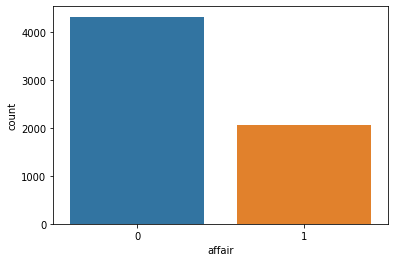

In [18]:
import seaborn as sns
sns.countplot(dta['affair'])


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Model Training

In [14]:
lr = LogisticRegression( random_state=0)

lr.fit(X_train, y_train)

C:\Users\karma\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\karma\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
y_pred = lr.predict(X_test)

## Model Evaluation

In [16]:
lr.score(X_test, y_test)

0.7277486910994765

In [17]:
lr.get_params(deep=True)

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'warn',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 0,
 'solver': 'warn',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [24]:
#Confusion Matrix
confusion_matrix(y_test, y_pred)  


array([[1263,  141],
       [ 431,  266]], dtype=int64)

In [23]:
#Accuracy
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred, normalize=True, sample_weight=None)

0.7277486910994765

In [25]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred, average=None)

array([0.81536475, 0.48188406])